In [1]:
from os import listdir
from os.path import isfile, join 
import numpy as np
import pandas as pd 
import datetime as dt

path="C:/Users/paigebiller/Documents/GitHub/HomeworkFour"

In [2]:
def obtainRawFileNames(path,ext):
    extension = ext if "." in ext else ".{}".format(ext)
    return ["{}/{}".format(path,f) 
            for f in listdir(path)
            if isfile(join(path, f)) 
            and f.endswith(extension)]

In [3]:
def normalizedFields(line, separator):
    fields = [field.replace('|', ' ') for field in line.split(',')]
    if len(fields)<4:
        return ""
    return separator.join((fields[0], " ".join(fields[1:-2]), fields[-2], fields[-1]))

In [4]:
def filterEmptyLines(lines):
    return (line for line in lines if line != "")

In [5]:
def replaceComasByPipes(path):
    with open(path, 'r', encoding="Latin-1") as file :
        filedata = file.read()
    
    filelines = filterEmptyLines(
                    (normalizedFields(line, '|') 
                     for line in filedata.split('\n')))

    # Write the file out again
    with open(path.replace('.','_cleaned.'), 'w', encoding="Latin-1") as file:
        file.write("\n".join(filelines))

In [6]:
print("\n".join(obtainRawFileNames(
                path,
                "csv"
        )))

C:/Users/paigebiller/Documents/GitHub/HomeworkFour/assigned_to_cleaned.csv
C:/Users/paigebiller/Documents/GitHub/HomeworkFour/assigned_to_cleaned_cleaned.csv
C:/Users/paigebiller/Documents/GitHub/HomeworkFour/assigned_to_cleaned_cleaned_cleaned.csv
C:/Users/paigebiller/Documents/GitHub/HomeworkFour/assigned_to_cleaned_cleaned_cleaned_cleaned.csv
C:/Users/paigebiller/Documents/GitHub/HomeworkFour/bug_status_cleaned.csv
C:/Users/paigebiller/Documents/GitHub/HomeworkFour/bug_status_cleaned_cleaned.csv
C:/Users/paigebiller/Documents/GitHub/HomeworkFour/bug_status_cleaned_cleaned_cleaned.csv
C:/Users/paigebiller/Documents/GitHub/HomeworkFour/bug_status_cleaned_cleaned_cleaned_cleaned.csv
C:/Users/paigebiller/Documents/GitHub/HomeworkFour/cc_cleaned.csv
C:/Users/paigebiller/Documents/GitHub/HomeworkFour/cc_cleaned_cleaned.csv
C:/Users/paigebiller/Documents/GitHub/HomeworkFour/cc_cleaned_cleaned_cleaned.csv
C:/Users/paigebiller/Documents/GitHub/HomeworkFour/cc_cleaned_cleaned_cleaned_cleaned.

In [7]:
for file in obtainRawFileNames(path, "csv"):
    replaceComasByPipes(file)       

In [8]:
durationDf = pd.read_csv("{}/{}".format(path,"resolution_cleaned.csv"),sep='|')
durationDf.shape                 

(352342, 4)

In [9]:
def calculateDuration(x):
    if len(x) ==1:
        arbitraryMax = ((dt.datetime(2013,1,1) - dt.datetime(1970,1,1)).total_seconds())
        return arbitraryMax - min(x) 
    return max(x) - min(x)
    
durationDf.sort_values("id")
durationDf["when"] = durationDf["when"].apply(pd.to_numeric)
durationDf["duration"] = durationDf.groupby("id")["when"].apply(calculateDuration)
durationDf = durationDf[np.isnan(durationDf["duration"])!=True]
print(durationDf)

            id        what        when    who     duration
1       287145   DUPLICATE  1250739410   1760     759674.0
2       121995         NaN  1135315440   3686   17434559.0
3       320590         NaN  1279761012  90578   18125013.0
4       320590   DUPLICATE  1281727501     18   12253962.0
5       287149         NaN  1250734801  17941     136556.0
6       287149       FIXED  1251110004   5470   10353286.0
7        51829         NaN  1076571036   3367  112650241.0
8        51829       FIXED  1209053023   5470     137820.0
9        89372         NaN  1112090626   2478     137850.0
10       89372   DUPLICATE  1112092639   1068     138040.0
11       89373         NaN  1112090753   1961     138488.0
12       89373   DUPLICATE  1176473814     34     138555.0
13       89374         NaN  1112091035     57     138600.0
14       89374  WORKSFORME  1112118360   3481     672060.0
15       89374         NaN  1112122380   3481    1791037.0
16       89374       FIXED  1112627442   3481   10433316

In [10]:
ccDf = pd.read_csv("{}/{}".format(path,"cc_cleaned.csv"),sep='|')
ccDf.shape 

(352915, 4)

In [11]:
def calculateTotalCcs(x):
    ccs = x.str.split(';').count()
    return ccs
    
ccDf.sort_values("id")
ccDf["totalCcs"] = ccDf.groupby("id")["what"].apply(calculateTotalCcs)
ccDf = ccDf[np.isnan(ccDf["totalCcs"])!=True]
print(ccDf)

            id                                               what        when  \
1       287145                           markus_keller@ch.ibm.com  1250739392   
2       287145                           daniel_megert@ch.ibm.com  1250815849   
3        29687                                                NaN  1042765523   
4        23774                                                NaN  1032355990   
5       161057                                                NaN  1160987503   
6       287149                                                NaN  1250734801   
7       287149                                    loskutov@gmx.de  1250736569   
8       287149                                pinnamur@in.ibm.com  1250738737   
9       287149                          Silenio_Quarti@ca.ibm.com  1250768165   
10      287149                      caroline.rieder@windriver.com  1253500360   
11      287149                     martin.oberhuber@windriver.com  1254761897   
12      287149              

In [12]:
openMonthDf = pd.read_csv("{}/{}".format(path,"reports_cleaned.csv"),sep='|')
openMonthDf.shape 

(165547, 4)

In [13]:
def calculateOpenMonth(column):
    dates = pd.to_datetime(column,unit='s')
    return dates.map(lambda x : x.month)
    
openMonthDf.sort_values("id")
openMonthDf["opening"] = openMonthDf["opening"].apply(pd.to_numeric)
openMonthDf["openMonth"] = openMonthDf.groupby("id")["opening"].apply(calculateOpenMonth)
print(openMonthDf)

            id current_resolution current_status     opening  reporter  \
0        50088               WORKSFORME RESOLVED  1074167758        11   
1       287145                DUPLICATE RESOLVED  1250730717      6254   
2       121995                          ASSIGNED  1135315440      3686   
3        29687                DUPLICATE RESOLVED  1042765523      3252   
4       274909                DUPLICATE RESOLVED  1241453258     58917   
5       320590                DUPLICATE RESOLVED  1279761012     90578   
6       287149                    FIXED RESOLVED  1250734801     17941   
7        89372                DUPLICATE RESOLVED  1112090626      2478   
8        89373                DUPLICATE RESOLVED  1112090753      1961   
9        89374                    FIXED VERIFIED  1112091035        57   
10       89375                DUPLICATE RESOLVED  1112091098      2478   
11       89376                 WORKSFORME CLOSED  1112091324      8129   
12       89378                      FI

In [14]:
severityDf = pd.read_csv("{}/{}".format(path,"severity_cleaned.csv"),sep='|')
print(severityDf)

            id         what        when    who
0        50088       normal  1074167758     11
1       287145       normal  1250730717   6254
2       121995       normal  1135315440   3686
3        29687       normal  1042765523   3252
4        23774        major  1032355990     37
5        66285       normal  1086765710  10787
6       320590       normal  1279761012  90578
7       287149       normal  1250734801  17941
8        51829       normal  1076571036   3367
9        89372       normal  1112090626   2478
10       89373       normal  1112090753   1961
11       89374       normal  1112091035     57
12       89375       normal  1112091098   2478
13       89376       normal  1112091324   8129
14       89378       normal  1112092461   8126
15       89379       normal  1112094306    261
16      246175        major  1220488960  47544
17      256902        major  1227863779     13
18       36606       normal  1050506828   3957
19        5988       normal  1005844787    179
20      25690

In [15]:
def calculateSeverity(x):
    return x
    
severityDf.sort_values("id")
severityDf["severity"] = severityDf["what"]
severityDf.drop_duplicates(['id'])
print(severityDf)

            id         what        when    who     severity
0        50088       normal  1074167758     11       normal
1       287145       normal  1250730717   6254       normal
2       121995       normal  1135315440   3686       normal
3        29687       normal  1042765523   3252       normal
4        23774        major  1032355990     37        major
5        66285       normal  1086765710  10787       normal
6       320590       normal  1279761012  90578       normal
7       287149       normal  1250734801  17941       normal
8        51829       normal  1076571036   3367       normal
9        89372       normal  1112090626   2478       normal
10       89373       normal  1112090753   1961       normal
11       89374       normal  1112091035     57       normal
12       89375       normal  1112091098   2478       normal
13       89376       normal  1112091324   8129       normal
14       89378       normal  1112092461   8126       normal
15       89379       normal  1112094306 

In [33]:
print(severit.to_string())

NameError: name 'df' is not defined

In [16]:
import seaborn as sns

In [17]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

print(durationDf)

            id        what        when    who     duration
1       287145   DUPLICATE  1250739410   1760     759674.0
2       121995         NaN  1135315440   3686   17434559.0
3       320590         NaN  1279761012  90578   18125013.0
4       320590   DUPLICATE  1281727501     18   12253962.0
5       287149         NaN  1250734801  17941     136556.0
6       287149       FIXED  1251110004   5470   10353286.0
7        51829         NaN  1076571036   3367  112650241.0
8        51829       FIXED  1209053023   5470     137820.0
9        89372         NaN  1112090626   2478     137850.0
10       89372   DUPLICATE  1112092639   1068     138040.0
11       89373         NaN  1112090753   1961     138488.0
12       89373   DUPLICATE  1176473814     34     138555.0
13       89374         NaN  1112091035     57     138600.0
14       89374  WORKSFORME  1112118360   3481     672060.0
15       89374         NaN  1112122380   3481    1791037.0
16       89374       FIXED  1112627442   3481   10433316

In [31]:
severityDf.merge(durationDf, left_on='id', right_on='id', how='outer')

,id,what_x,when_x,who_x,severity,what_y,when_y,who_y,duration
0,50088,normal,1074167758,11,normal,NaN,NaN,NaN,NaN
1,287145,normal,1250730717,6254,normal,DUPLICATE,1.250739e+09,1760.0,759674.0
2,121995,normal,1135315440,3686,normal,NaN,1.135315e+09,3686.0,17434559.0
3,29687,normal,1042765523,3252,normal,NaN,NaN,NaN,NaN
4,23774,major,1032355990,37,major,NaN,NaN,NaN,NaN
5,66285,normal,1086765710,10787,normal,NaN,1.086766e+09,10787.0,102512.0
6,66285,normal,1086765710,10787,normal,NaN,1.091073e+09,39.0,7600790.0
7,66285,normal,1086765710,10787,normal,FIXED,1.093960e+09,61.0,86000.0
8,320590,normal,1279761012,90578,normal,NaN,1.279761e+09,90578.0,18125013.0
9,320590,normal,1279761012,90578,normal,DUPLICATE,1.281728e+09,18.0,12253962.0


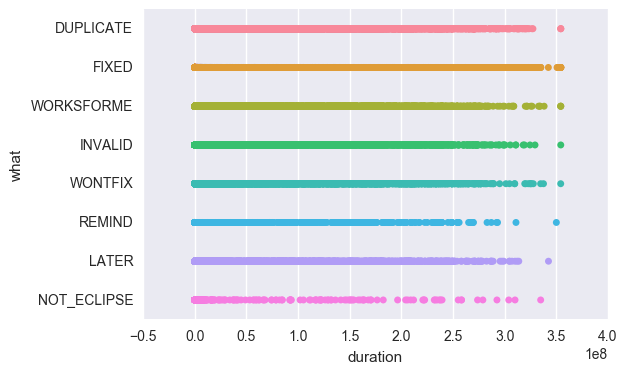

In [18]:
sns.stripplot(x="duration", y="what", data=durationDf)

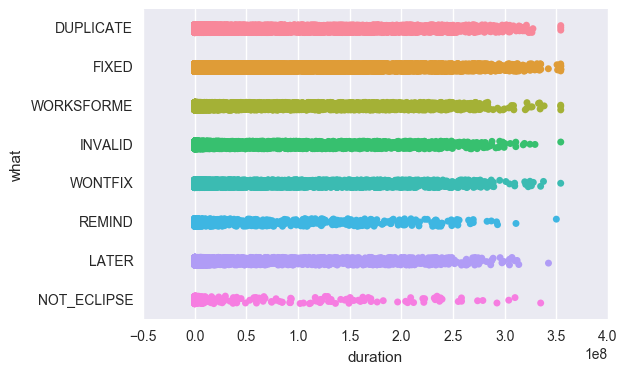

In [22]:
sns.stripplot(x="duration", y="what", data=durationDf, jitter=True)

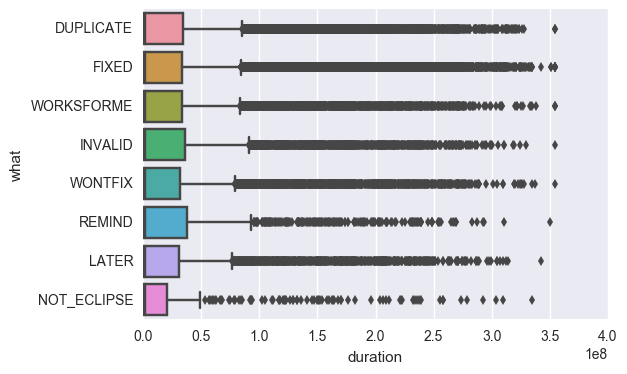

In [21]:
sns.boxplot(x="duration", y="what", data=durationDf)

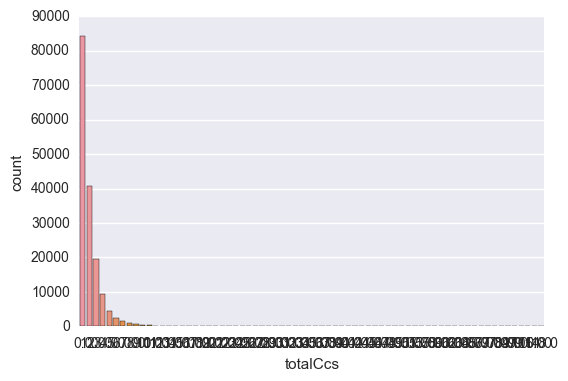

In [28]:
sns.countplot(x="totalCcs", data=ccDf)

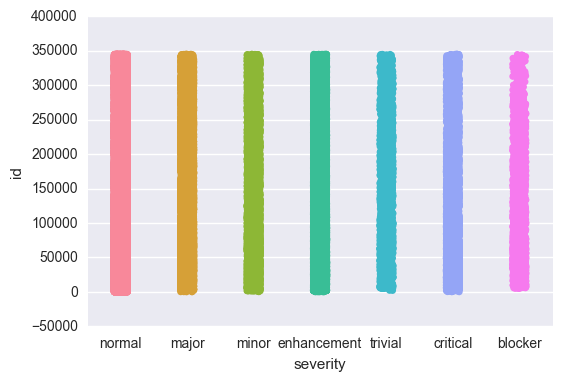

In [30]:
sns.stripplot(x="severity", y="id", data=severityDf, jitter=True)